In [1]:
import os
import netCDF4 as nc
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from scipy.interpolate import griddata
import matplotlib.ticker as mticker

In [2]:
# To use PLUMBER2_GPP_common_utils, change directory to where it exists
os.chdir('/g/data/w97/mm3972/scripts/Land_Drought_Rainfall')
from common_utils import *

#### Check offline sim

In [3]:
AWRA_path      = '/g/data/w97/mm3972/data/Soil_Moisture/AWRA_v6/'
ESA_CCI_path   = '/g/data/w97/mm3972/data/Soil_Moisture/ESA_CCI/'
CABLE_old_file     = '/g/data/w97/mm3972/model/cable/runs/Land_drought_rainfall_runs/spinup_run_1970_1999/outputs/before_increase_hydraulic_conductivity/cable_out_1970-1999.nc'
CABLE_new_file     = '/g/data/w97/mm3972/model/cable/runs/Land_drought_rainfall_runs/spinup_run_1970_1999/outputs/backup/cable_out_1970-1993.nc'

In [4]:
# Read CABLE
f_cable_old      = nc.Dataset(CABLE_old_file, 'r')
SM_cable_old     = f_cable_old.variables['SoilMoist'][:]
SM_cable_old_mean= np.nanmean(SM_cable_old,axis=(2,3))

FileNotFoundError: [Errno 2] No such file or directory: '/g/data/w97/mm3972/model/cable/runs/Land_drought_rainfall_runs/spinup_run_1970_1999/outputs/before_increase_hydraulic_conductivity/cable_out_1970-1999.nc'

In [8]:
# Read CABLE
f_cable_new      = nc.Dataset(CABLE_new_file, 'r')
SM_cable_new     = f_cable_new.variables['SoilMoist'][:]
SM_cable_new_mean= np.nanmean(SM_cable_new,axis=(2,3))

#### soil water content (m3/m3)

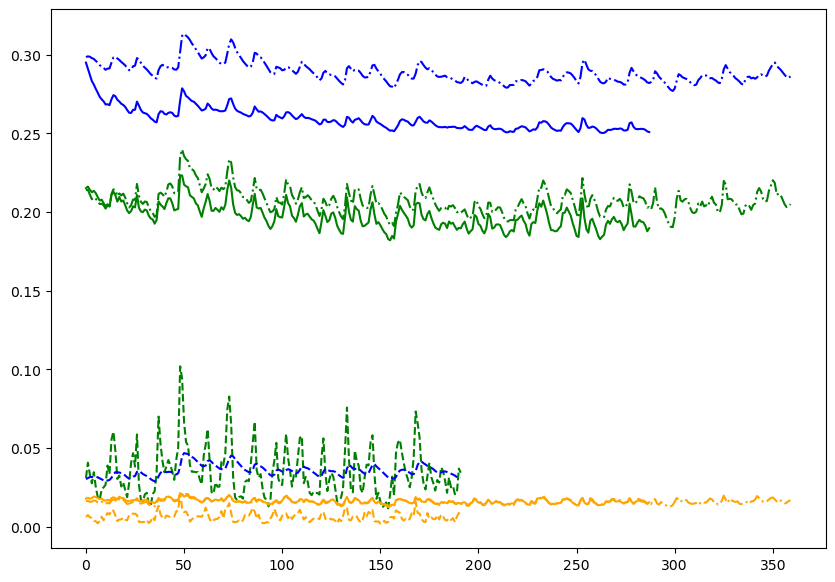

In [9]:
# Read AWRA (S0, 0-0.1m; Ss, 0.1-1m; Sd, 1-6m) 
f_s0         = nc.Dataset(f'{AWRA_path}s0/s0_1970-2024_monthly.nc', 'r')
SM_s0        = f_s0.variables['s0'][:]/0.1/1000
lats         = f_s0.variables['latitude'][:]
lons         = f_s0.variables['longitude'][:]
lons_2D, lats_2D = np.meshgrid(lons, lats)
    
f_ss         = nc.Dataset(f'{AWRA_path}ss/ss_1970-2024_monthly.nc', 'r')
SM_ss        = f_ss.variables['ss'][:]/0.9/1000

f_sd         = nc.Dataset(f'{AWRA_path}sd/sd_1970-2024_monthly.nc', 'r')
SM_sd        = f_sd.variables['sd'][:]/5/1000

SM_s0_mean   = np.nanmean(SM_s0,axis=(1,2))
SM_ss_mean   = np.nanmean(SM_ss,axis=(1,2))
SM_sd_mean   = np.nanmean(SM_sd,axis=(1,2))

# 0.022 0.058 0.154 0.409 1.085 2.872
# Old simulation
SM_cable_old_s0_mean = (SM_cable_old_mean[:,0]*0.022+SM_cable_old_mean[:,1]*0.058+SM_cable_old_mean[:,2]*0.02)
SM_cable_old_ss_mean = (SM_cable_old_mean[:,2]*0.134+SM_cable_old_mean[:,3]*0.409+SM_cable_old_mean[:,4]*0.357)
SM_cable_old_sd_mean = ((SM_cable_old_mean[:,4]*0.728+SM_cable_old_mean[:,5]*2.872)/(0.728+2.872))

# New simulation 
SM_cable_new_s0_mean = (SM_cable_new_mean[:,0]*0.022+SM_cable_new_mean[:,1]*0.058+SM_cable_new_mean[:,2]*0.02)
SM_cable_new_ss_mean = (SM_cable_new_mean[:,2]*0.134+SM_cable_new_mean[:,3]*0.409+SM_cable_new_mean[:,4]*0.357)
SM_cable_new_sd_mean = ((SM_cable_new_mean[:,4]*0.728+SM_cable_new_mean[:,5]*2.872)/(0.728+2.872))

# Create a global map plot
fig, ax       = plt.subplots(figsize=[10, 7])

plot= ax.plot(SM_s0_mean[:192],c='orange',ls='--')
plot= ax.plot(SM_ss_mean[:192],c='green',ls='--')
plot= ax.plot(SM_sd_mean[:192],c='blue',ls='--')
plot= ax.plot(SM_cable_old_s0_mean[:],c='orange',ls='-.')
plot= ax.plot(SM_cable_old_ss_mean[:],c='green',ls='-.')
plot= ax.plot(SM_cable_old_sd_mean[:],c='blue',ls='-.')
plot= ax.plot(SM_cable_new_s0_mean[:],c='orange',ls='-')
plot= ax.plot(SM_cable_new_ss_mean[:],c='green',ls='-')
plot= ax.plot(SM_cable_new_sd_mean[:],c='blue',ls='-')

plt.show()

#### soil water content (mm)

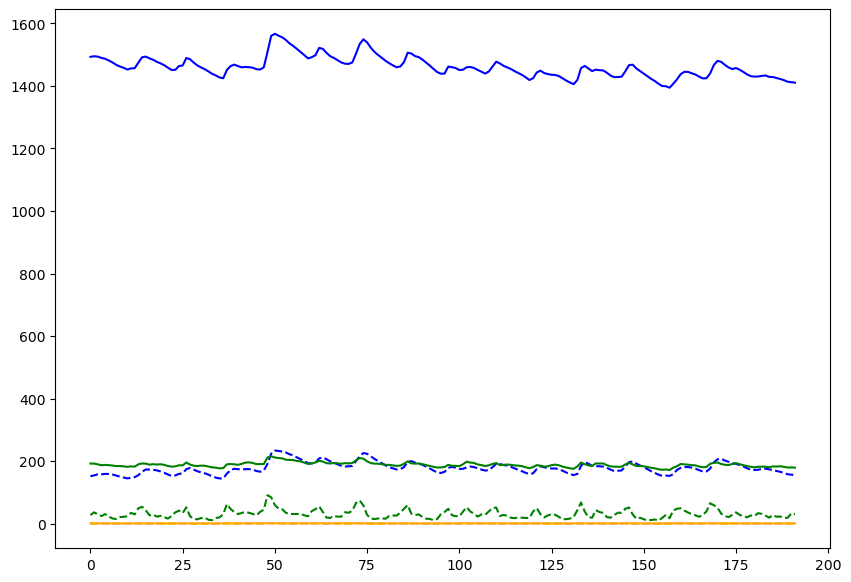

In [33]:
# Read AWRA (S0, 0-0.1m; Ss, 0.1-1m; Sd, 1-6m) 
f_s0         = nc.Dataset(f'{AWRA_path}s0/s0_1970-2024_monthly.nc', 'r')
SM_s0        = f_s0.variables['s0'][:] #/0.1/1000
lats         = f_s0.variables['latitude'][:]
lons         = f_s0.variables['longitude'][:]
lons_2D, lats_2D = np.meshgrid(lons, lats)
    
f_ss         = nc.Dataset(f'{AWRA_path}ss/ss_1970-2024_monthly.nc', 'r')
SM_ss        = f_ss.variables['ss'][:]#/0.9/1000

f_sd         = nc.Dataset(f'{AWRA_path}sd/sd_1970-2024_monthly.nc', 'r')
SM_sd        = f_sd.variables['sd'][:]#/5/1000

SM_s0_mean   = np.nanmean(SM_s0,axis=(1,2))
SM_ss_mean   = np.nanmean(SM_ss,axis=(1,2))
SM_sd_mean   = np.nanmean(SM_sd,axis=(1,2))

# 0.022 0.058 0.154 0.409 1.085 2.872
SM_cable_s0_mean = (SM_cable_mean[:,0]*0.022+SM_cable_mean[:,1]*0.058+SM_cable_mean[:,2]*0.02)*0.1*1000
SM_cable_ss_mean = (SM_cable_mean[:,2]*0.134+SM_cable_mean[:,3]*0.409+SM_cable_mean[:,4]*0.357)*0.9*1000
SM_cable_sd_mean = ((SM_cable_mean[:,4]*0.728+SM_cable_mean[:,5]*2.872)/(0.728+2.872))*5*1000

# Create a global map plot
fig, ax       = plt.subplots(figsize=[10, 7])

plot= ax.plot(SM_s0_mean[:192],c='orange',ls='--')
plot= ax.plot(SM_ss_mean[:192],c='green',ls='--')
plot= ax.plot(SM_sd_mean[:192],c='blue',ls='--')
plot= ax.plot(SM_cable_s0_mean[:],c='orange',ls='-')
plot= ax.plot(SM_cable_ss_mean[:],c='green',ls='-')
plot= ax.plot(SM_cable_sd_mean[:],c='blue',ls='-')

plt.show()

#### The variability is larger in AWRA soil moisture in the top 1 meter, CABLE is much wetter than AWRA below 0.1 meter

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

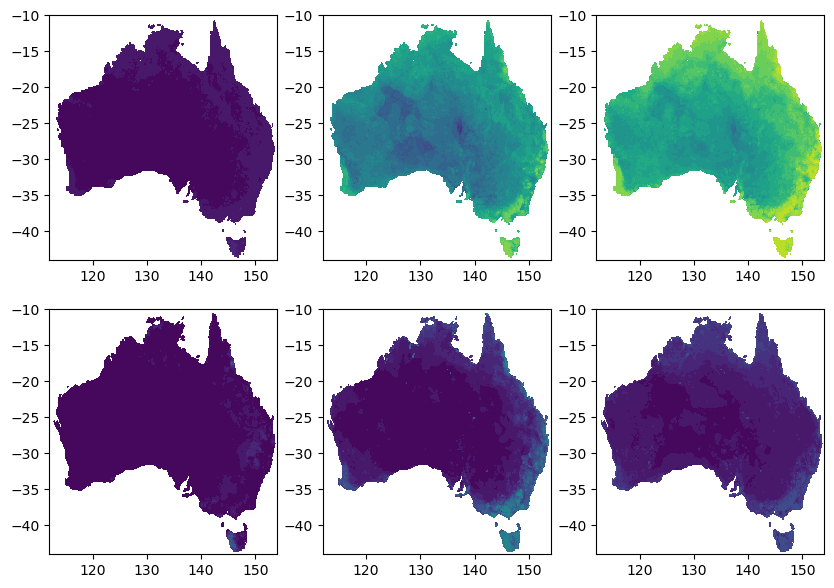

In [40]:
# Read AWRA (S0, 0-0.1m; Ss, 0.1-1m; Sd, 1-6m) 
f_s0         = nc.Dataset(f'{AWRA_path}s0/s0_1970-2024_monthly.nc', 'r')
SM_s0        = f_s0.variables['s0'][:]/0.1/1000
lats         = f_s0.variables['latitude'][:]
lons         = f_s0.variables['longitude'][:]
lons_2D, lats_2D = np.meshgrid(lons, lats)
    
f_ss         = nc.Dataset(f'{AWRA_path}ss/ss_1970-2024_monthly.nc', 'r')
SM_ss        = f_ss.variables['ss'][:]/0.9/1000

f_sd         = nc.Dataset(f'{AWRA_path}sd/sd_1970-2024_monthly.nc', 'r')
SM_sd        = f_sd.variables['sd'][:]/5/1000

# 0.022 0.058 0.154 0.409 1.085 2.872
SM_cable_s0 = (SM_cable[:,0,:,:]*0.022+SM_cable[:,1,:,:]*0.058+SM_cable[:,2,:,:]*0.02)
SM_cable_ss = (SM_cable[:,2,:,:]*0.134+SM_cable[:,3,:,:]*0.409+SM_cable[:,4,:,:]*0.357)
SM_cable_sd = ((SM_cable[:,4,:,:]*0.728+SM_cable[:,5,:,:]*2.872)/(0.728+2.872))

# Create a global map plot
fig, ax       = plt.subplots(nrows=2, ncols=3,figsize=[10, 7])

# for yr in np.arange(1970,1986,1):
yr = 1970
ts = (yr-1970)*12

plot1= ax[0,0].contourf(lons_2D, lats_2D, np.mean(SM_cable_s0[ts:ts+12,::-1,:],axis=0),levels=np.arange(0,0.5,0.02))
plot2= ax[0,1].contourf(lons_2D, lats_2D, np.mean(SM_cable_ss[ts:ts+12,::-1,:],axis=0),levels=np.arange(0,0.5,0.02))
plot3= ax[0,2].contourf(lons_2D, lats_2D, np.mean(SM_cable_sd[ts:ts+12,::-1,:],axis=0),levels=np.arange(0,0.5,0.02))

plot4= ax[1,0].contourf(lons_2D, lats_2D, np.mean(SM_s0[ts:ts+12,:,:],axis=0),levels=np.arange(0,0.5,0.02))
plot5= ax[1,1].contourf(lons_2D, lats_2D, np.mean(SM_ss[ts:ts+12,:,:],axis=0),levels=np.arange(0,0.5,0.02))
plot6= ax[1,2].contourf(lons_2D, lats_2D, np.mean(SM_sd[ts:ts+12,:,:],axis=0),levels=np.arange(0,0.5,0.02))

plt.colorbar()
plt.show()

#### Check albedo, LAI, SM

In [3]:
CABLE_new_file = '/g/data/w97/mm3972/model/cable/runs/Land_drought_rainfall_runs/spinup_run_1970_1999/outputs/cable_out_1999.nc'
f           = nc.Dataset(CABLE_new_file, 'r')

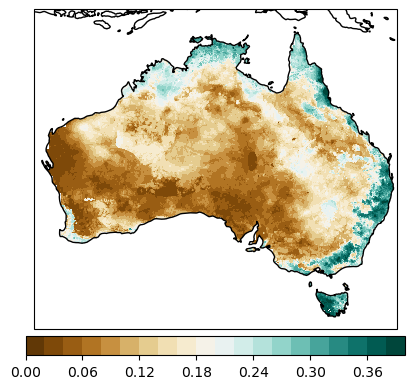

In [19]:
# albedo      = f.variables['Albedo'][11,:,:]
# LAI         = f.variables['LAI'][11,:,:]
SM          = f.variables['SoilMoist'][11,0,:,:]
lat         = f.variables['latitude'][:]
lon         = f.variables['longitude'][:]
# lons_2D, lats_2D = np.meshgrid(lon, lat)

# ================== Start Plotting =================
fig, ax = plt.subplots(figsize=(7, 5), subplot_kw={'projection': ccrs.PlateCarree()})

# Set map extent for specific region
ax.set_extent([112, 154, -43, -8])
ax.coastlines(resolution="50m", linewidth=1)

# # Add gridlines and format them
# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
# gl.top_labels = False
# gl.right_labels = False
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER

# Plot the original accumulated day data
levels = np.arange(0,0.42,0.02)
# levels = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,6,6.5,7]
plot   = ax.contourf(lon, lat, SM,levels=levels,cmap=plt.cm.BrBG)

# Add colorbar with label
cbar = plt.colorbar(plot, ax=ax, orientation="horizontal", pad=0.02, aspect=20, shrink=0.7)
plt.show()